# House Prices - Kaggle contest

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import pickle
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

In [3]:
df_train=pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
df_train.set_index('Id', inplace=True)

In [4]:
df_test=pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
df_test.set_index('Id', inplace=True)

In [5]:
df=pd.concat([df_train, df_test])

## Frist glance to the data

In [6]:
df.shape

(2919, 80)

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object

In [9]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [10]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## Dealing with missing data

We will look more closely to missing data and decide what we should do with them.

Features with missing data: MSZoning, LotFrontage, Alley, Utilities, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, GarageCars, GarageArea, PoolQC, Fence, MiscFeature, SaleType

##### MSZoning

In [12]:
len(df.loc[df['MSZoning'].isna(), 'MSZoning'])

4

In [13]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

We will replace the missing values by the most common ones.

##### LotFrontage

In [14]:
len(df.loc[df['LotFrontage'].isna(), 'LotFrontage'])

486

<AxesSubplot:>

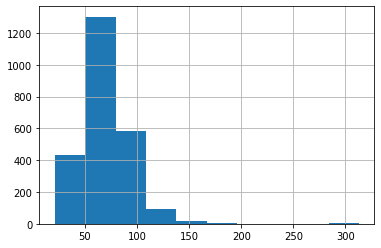

In [15]:
df['LotFrontage'].hist()

In [16]:
df.loc[df['LotFrontage'].isna(),'LotConfig'].value_counts()

Inside     271
Corner     104
CulDSac     87
FR2         20
FR3          4
Name: LotConfig, dtype: int64

We cannot say that those missing values are because the linear feet of street connected to the property is equal to 0. Thus we will replace the missing values by the median (69), but we will maybe not taken this feature into account (rate of missing values: 17.7%).

##### Alley

In [17]:
len(df.loc[df['Alley'].isna(), 'Alley'])

2721

In [18]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

There is no 'no alley access' value, we can thus imagine that the missing values are those ones, and fill them with 'NA'.

##### Utilities

In [19]:
len(df.loc[df['Utilities'].isna(), 'Utilities'])

2

In [20]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

We will replace the missing value by its most commone one.

##### Exterior1st and Exterior2nd

In [21]:
len(df.loc[df['Exterior1st'].isna(), 'Exterior1st']), len(df.loc[df['Exterior2nd'].isna(), 'Exterior2nd'])

(1, 1)

In [22]:
df['Exterior1st'].value_counts(), df['Exterior2nd'].value_counts()

(VinylSd    1025
 MetalSd     450
 HdBoard     442
 Wd Sdng     411
 Plywood     221
 CemntBd     126
 BrkFace      87
 WdShing      56
 AsbShng      44
 Stucco       43
 BrkComm       6
 Stone         2
 AsphShn       2
 CBlock        2
 ImStucc       1
 Name: Exterior1st, dtype: int64,
 VinylSd    1014
 MetalSd     447
 HdBoard     406
 Wd Sdng     391
 Plywood     270
 CmentBd     126
 Wd Shng      81
 Stucco       47
 BrkFace      47
 AsbShng      38
 Brk Cmn      22
 ImStucc      15
 Stone         6
 AsphShn       4
 CBlock        3
 Other         1
 Name: Exterior2nd, dtype: int64)

We will replace the missing values by the most common ones.

##### MasVnrType and MasVnrArea

In [23]:
len(df.loc[df['MasVnrType'].isna(), 'MasVnrType']), len(df.loc[df['MasVnrArea'].isna(), 'MasVnrArea'])

(24, 23)

In [24]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [25]:
df.loc[df['MasVnrType'].isna(), 'MasVnrArea']

Id
235       NaN
530       NaN
651       NaN
937       NaN
974       NaN
978       NaN
1244      NaN
1279      NaN
1692      NaN
1707      NaN
1883      NaN
1993      NaN
2005      NaN
2042      NaN
2312      NaN
2326      NaN
2341      NaN
2350      NaN
2369      NaN
2593      NaN
2611    198.0
2658      NaN
2687      NaN
2863      NaN
Name: MasVnrArea, dtype: float64

It seems that there are 8 missing values for those features (for the same instances). We can replace them with their most common value: 'None' and '0'.

##### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath

In [26]:
features=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
[len(df.loc[df[f].isna(), f]) for f in features]

[81, 82, 82, 79, 80, 1, 1, 1, 1, 2, 2]

In [27]:
[df[f].value_counts() for f in features]

[TA    1283
 Gd    1209
 Ex     258
 Fa      88
 Name: BsmtQual, dtype: int64,
 TA    2606
 Gd     122
 Fa     104
 Po       5
 Name: BsmtCond, dtype: int64,
 No    1904
 Av     418
 Gd     276
 Mn     239
 Name: BsmtExposure, dtype: int64,
 Unf    851
 GLQ    849
 ALQ    429
 Rec    288
 BLQ    269
 LwQ    154
 Name: BsmtFinType1, dtype: int64,
 Unf    2493
 Rec     105
 LwQ      87
 BLQ      68
 ALQ      52
 GLQ      34
 Name: BsmtFinType2, dtype: int64,
 0.0       929
 24.0       27
 16.0       14
 300.0       9
 288.0       8
          ... 
 1022.0      1
 939.0       1
 1124.0      1
 1619.0      1
 1106.0      1
 Name: BsmtFinSF1, Length: 991, dtype: int64,
 0.0      2571
 294.0       5
 180.0       5
 162.0       3
 539.0       3
          ... 
 196.0       1
 904.0       1
 456.0       1
 624.0       1
 823.0       1
 Name: BsmtFinSF2, Length: 272, dtype: int64,
 0.0       241
 384.0      19
 728.0      14
 672.0      13
 600.0      12
          ... 
 1503.0      1
 445.0      

In [28]:
df.loc[df['BsmtFinSF1'].isna(), features]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.loc[df['BsmtFullBath'].isna(), features]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [30]:
df.loc[df['BsmtExposure'].isna(), features]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2805,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2825,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
['{}: {}'.format(f,df.loc[(df[f].isna()) & ~((df['BsmtFinSF1']==0) & (df['BsmtFinSF2']==0)), 'BsmtFinSF1'].value_counts()) for f in features]

['BsmtQual: Series([], Name: BsmtFinSF1, dtype: int64)',
 'BsmtCond: 755.0     1\n1033.0    1\n1044.0    1\nName: BsmtFinSF1, dtype: int64',
 'BsmtExposure: Series([], Name: BsmtFinSF1, dtype: int64)',
 'BsmtFinType1: Series([], Name: BsmtFinSF1, dtype: int64)',
 'BsmtFinType2: 1124.0    1\nName: BsmtFinSF1, dtype: int64',
 'BsmtFinSF1: Series([], Name: BsmtFinSF1, dtype: int64)',
 'BsmtFinSF2: Series([], Name: BsmtFinSF1, dtype: int64)',
 'BsmtUnfSF: Series([], Name: BsmtFinSF1, dtype: int64)',
 'TotalBsmtSF: Series([], Name: BsmtFinSF1, dtype: int64)',
 'BsmtFullBath: Series([], Name: BsmtFinSF1, dtype: int64)',
 'BsmtHalfBath: Series([], Name: BsmtFinSF1, dtype: int64)']

When the type1 or type2 area is not equal to zero, we replace the missing values by their most common ones (TA, TA, No, Unf, Unf).

Elsewhere, we replace the missing values by 'NA' because it means that there is no basement.

##### Electrical

In [32]:
len(df.loc[df['Electrical'].isna(), 'Electrical'])

1

In [33]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

We will replace the missing value by its most commone one: SBrkr

##### KitchenQual

In [34]:
len(df.loc[df['KitchenQual'].isna(), 'KitchenQual'])

1

In [35]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

We will replace the missing value by its most commone one: TA

##### Functional

In [36]:
len(df.loc[df['Functional'].isna(), 'Functional'])

2

In [37]:
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

We will replace the missing value by its most commone one: Typ

##### FireplaceQu

In [38]:
len(df.loc[df['FireplaceQu'].isna(), 'FireplaceQu'])

1420

In [39]:
df['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [40]:
df.loc[df['Fireplaces']==0, 'FireplaceQu'].value_counts()

Series([], Name: FireplaceQu, dtype: int64)

In [41]:
df.loc[df['FireplaceQu'].isna(), 'Fireplaces'].value_counts()

0    1420
Name: Fireplaces, dtype: int64

We will replace the missing values by 'NA' because it means that there is no fireplace.

##### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

In [42]:
features=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']
[len(df.loc[df[f].isna(), f]) for f in features]

[157, 159, 159, 159, 159, 1, 1]

In [43]:
df.loc[df['GarageCars'].isna(), features]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
Id,,,,,,,
2577,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
[df.loc[df['GarageArea']==0, f].value_counts() for f in features]

[Series([], Name: GarageType, dtype: int64),
 Series([], Name: GarageYrBlt, dtype: int64),
 Series([], Name: GarageFinish, dtype: int64),
 Series([], Name: GarageQual, dtype: int64),
 Series([], Name: GarageCond, dtype: int64),
 0.0    157
 Name: GarageCars, dtype: int64,
 0.0    157
 Name: GarageArea, dtype: int64]

In [45]:
[df.loc[df['GarageType'].isna(), f].value_counts() for f in features]

[Series([], Name: GarageType, dtype: int64),
 Series([], Name: GarageYrBlt, dtype: int64),
 Series([], Name: GarageFinish, dtype: int64),
 Series([], Name: GarageQual, dtype: int64),
 Series([], Name: GarageCond, dtype: int64),
 0.0    157
 Name: GarageCars, dtype: int64,
 0.0    157
 Name: GarageArea, dtype: int64]

We will replace the missing values by 'NA' because it means that there is no garage. Or with 0 for GarageCars en GarageArea.

##### PoolQC, Fence, MiscFeature

In [46]:
features=['PoolQC', 'Fence', 'MiscFeature']
[len(df.loc[df[f].isna(), f]) for f in features]

[2909, 2348, 2814]

In [47]:
df.loc[df['PoolArea']==0, 'PoolQC'].value_counts(), df.loc[df['PoolQC'].isna(), 'PoolArea'].value_counts()

(Series([], Name: PoolQC, dtype: int64),
 0      2906
 561       1
 444       1
 368       1
 Name: PoolArea, dtype: int64)

We will replace all the missing values by 'NA', because it means that there is no such feature.

##### SaleType

In [48]:
len(df.loc[df['SaleType'].isna(), 'SaleType'])

1

In [49]:
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

We will replace the missing value by its most commone one: WD

## Data preprocessing

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

We will do the following preprocessing steps:
1. **filling the missing values**: following what is explain in the 'Dealing with missing values' section
2. **dealing with categorical values**: to create dummies variables for these features
21. **dealing with non-linear features**: to create polynomial features
3. **selecting features and scaling them**: to select the features used and to scale them

In [51]:
# filling the missing values

class NAFiller(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        # MSZoning: filling with 'RL'
        df2['MSZoning'].fillna('RL', inplace=True)

        # LotFrontage: filling with median (69)
        df2['LotFrontage'].fillna(69, inplace=True)
        
        # Alley: filling with 'NA'
        df2['Alley'].fillna('NA', inplace=True)
        
        # Utilities: filling with 'AllPub'
        df2['Utilities'].fillna('AllPub', inplace=True)
        
        # Extorior1st and 2nd: filling with 'VinylSd'
        values={'Exterior1st':'VinylSd', 'Exterior2nd':'VinylSd'}
        df2.fillna(value=values, inplace=True)
        
        # MasVnrType, MasVnrArea: filling with 'None' and 0 resp.
        df2['MasVnrType'].fillna('None', inplace=True)
        df2['MasVnrArea'].fillna(0, inplace=True)
        
        # BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
        df2['BsmtFinSF1'].fillna(0, inplace=True)
        df2['BsmtFinSF2'].fillna(0, inplace=True)
        features1=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
        features2=['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
        for f in features1:
            df2.loc[((df2['BsmtFinSF1']==0) & (df2['BsmtFinSF2']==0)) & (df2[f].isna()), f] = 'NA'
        for f in features2:
            df2.loc[((df2['BsmtFinSF1']==0) & (df2['BsmtFinSF2']==0)) & (df2[f].isna()), f] = 0
        values={'BsmtQual':'TA', 'BsmtCond':'TA', 'BsmtExposure':'No', 'BsmtFinType1':'Unf', 'BsmtFinType2':'Unf'}
        df2.fillna(value=values, inplace=True)
                
        # Electrical: filling with 'SBrkr'
        df2['Electrical'].fillna('SBrkr', inplace=True)
        
        # KitchenQual: filling with 'TA'
        df2['KitchenQual'].fillna('TA', inplace=True)
        
        # Functional: filling with 'Typ'
        df2['Functional'].fillna('Typ', inplace=True)    
        
        # FireplaceQu: filling with 'NA'
        df2['FireplaceQu'].fillna('NA', inplace=True)
        
        # GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond: filling with 'NA' ;\
        #  GarageYrBlt: filling with the min-2 value (1898); GarageCars and GarageArea: filling with 0
        values={'GarageType':'NA', 'GarageYrBlt':1898, 'GarageFinish':'NA', 'GarageQual':'NA', 'GarageCond':'NA', 'GarageCars':0, 'GarageArea':0}
        df2.fillna(value=values, inplace=True)    
    
        # PoolQC, Fence, MiscFeature:filling with 'NA'
        values={'PoolQC':'NA', 'Fence':'NA', 'MiscFeature':'NA'}
        df2.fillna(value=values, inplace=True)
        
        # SaleType: filling with 'WD'
        df2['SaleType'].fillna('WD', inplace=True)

        
        return df2

    
# creating dummies variables

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features=features
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        for f in self.features:
            enc=OneHotEncoder()
            enc.fit(df2[f].values.reshape(-1,1))
            categories=enc.categories_[0]
            array=enc.transform(df2[f].values.reshape(-1,1)).toarray()
            for i,cat in enumerate(categories):
                df2['{}_{}'.format(f, cat)]=array[:,i]
        
        df2.drop(columns=self.features, inplace=True)
        
        return df2

    
# non-linear features

class NonLinearFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, non_linear_features, degree=5):
        self.non_linear_features=non_linear_features
        self.degree=degree
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        
        for f in self.non_linear_features:
            X_poly=PolynomialFeatures(degree=self.degree).fit_transform(df2[f].values.reshape(-1,1))
            c=X_poly.shape[1]
            for j in range(c):
                df2['{}_{}'.format(f, j)]=X_poly[:,j]
            
        df2.drop(columns=self.non_linear_features, inplace=True)
        
        return df2
    

# selecting features

class FeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features=features
    def fit(self, df, y=None):
        return self
    def transform(self, df, y=None):
        df2=df.copy()
        missing_features=[f for f in self.features if f not in list(df2)]
        for f in missing_features:
            df2[f]=np.zeros((df2.shape[0], 1))
        X=df2[self.features].values
        return X

## Data analysis and visualization

### Functions that we will use afterwards

In [52]:
def visualization_features(df, target, features, categorical_labels, noncategorical_labels, n_col=3, figsize=(20,15)):
    nb_features=len(features)
    n_row=nb_features//n_col + (nb_features%n_col > 0)
    fig, axs = plt.subplots(n_row, n_col, figsize=figsize)
    axs=axs.flatten()
    for i, f in enumerate(features):
        if f in categorical_labels: # boxplot
            df[[target, f]].boxplot(by=f, ax=axs[i])
            axs[i].set_title('{}'.format(f))
            axs[i].set_xlabel('')
          
        else: # scatter plot
            df[[target, f]].plot(kind='scatter', x=f, y=target, ax=axs[i])
            axs[i].set_title('{}'.format(f))
            axs[i].set_xlabel('')
            axs[i].set_ylabel('')
    
    fig.suptitle('')
            

In [53]:
def pearsonization(df, base, labels='all'):
    Coef=[]
    P_value=[]
    Corr_type=[]
    if labels=='all':
        labels=list(df)
    for l in labels:
        coef, p_value = stats.pearsonr(df[base], df[l])
        if p_value<0.001:
            corr_type='***'
        elif p_value<0.005:
            corr_type='**'
        else:
            corr_type=''
        Coef.append(coef)
        P_value.append(p_value)
        Corr_type.append(corr_type)
    df_pearson=pd.DataFrame(index=labels, data={'pearson_coef': Coef, 'p_value': P_value, 'correlation strenght': Corr_type})
    df_pearson.sort_values(by='pearson_coef', inplace=True)
    return df_pearson

### Dividing the features in two groups: categorical and non-categorical ones

In [54]:
target='SalePrice'
categorical_labels=['MSSubClass']+list(df_train.dtypes[df_train.dtypes=='object'].index)
noncategorical_labels=[l for l in list(df_train) if l not in categorical_labels+[target]]

In [55]:
#df2=NAFiller().fit_transform(df_train_nooutliers)
df2=NAFiller().fit_transform(df_train)

### Analyses

#### Visualising all the features

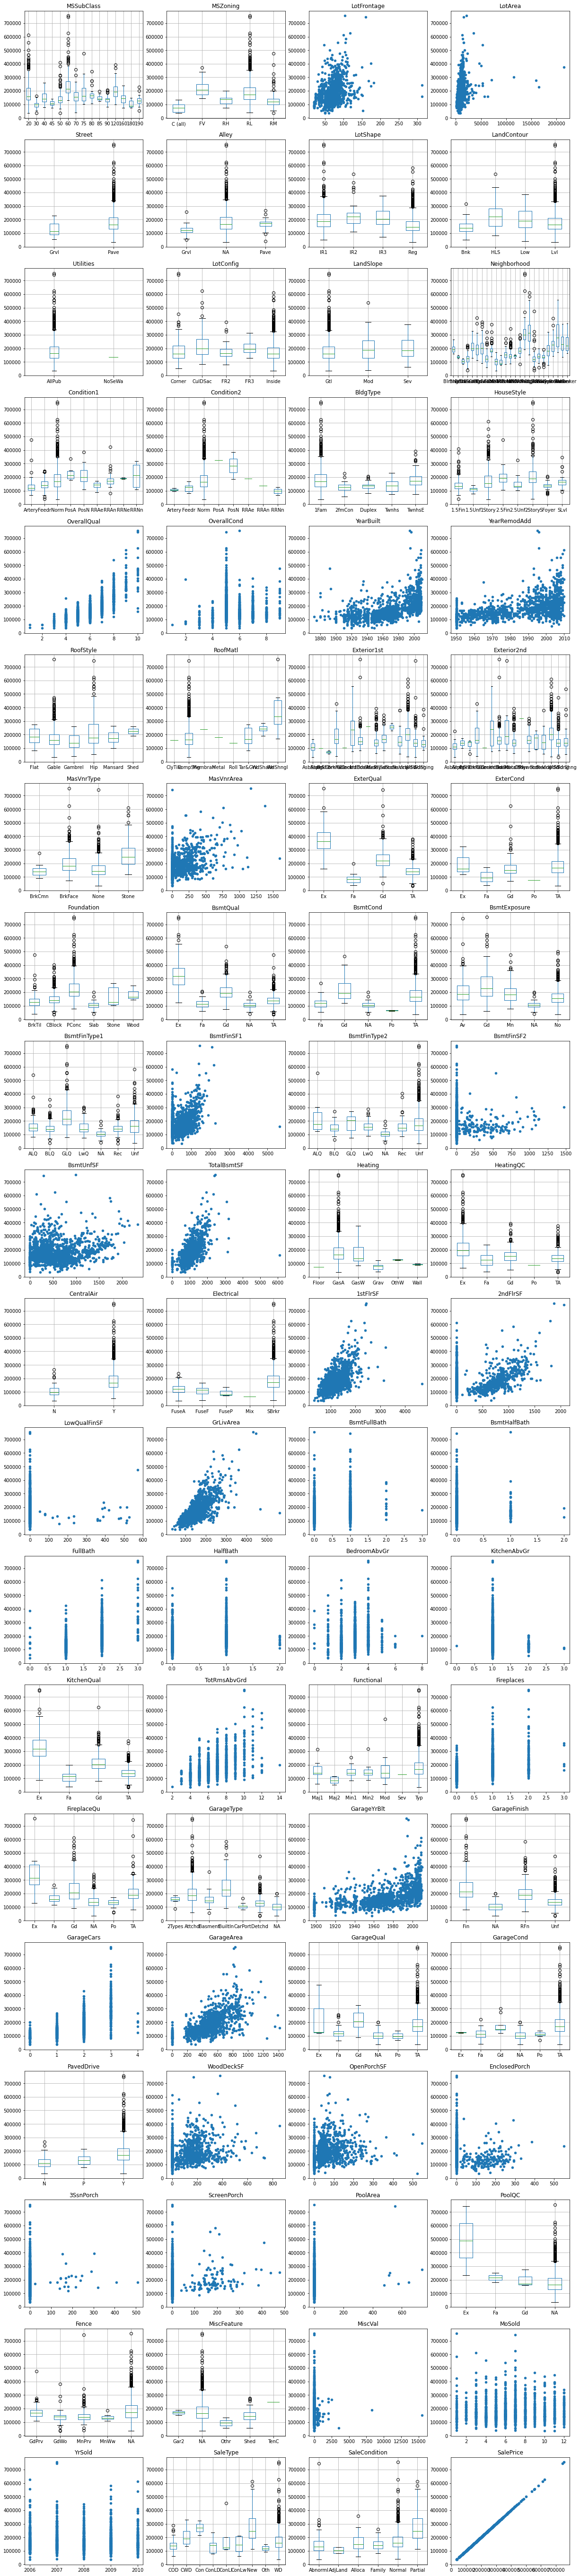

In [56]:
visualization_features(
    df=df2,
    target='SalePrice',
    features=list(df2),
    categorical_labels=categorical_labels,
    noncategorical_labels=noncategorical_labels,
    n_col=4,
    figsize=(20,100)
)

#### Looking for unimportant features

It seems that some of them are not important: Utilities, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal.

Let's see if that is true by looking to its correlation and p-value.

In [57]:
non_important=['Utilities', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',\
               'Fence', 'MiscFeature', 'MiscVal', 'SalePrice']

non_important_categorical=[f for f in non_important if f in categorical_labels]

df_nonimportant=df2[non_important].copy()

In [58]:
df_nonimportant_dummies=CategoricalEncoder(features=non_important_categorical).fit_transform(df_nonimportant)

In [59]:
pearsonization(df_nonimportant_dummies, 'SalePrice')

,pearson_coef,p_value,correlation strenght
Fence_MnPrv,-0.140613,6.850660e-08,***
EnclosedPorch,-0.128578,8.255770e-07,***
Fence_GdWo,-0.100047,1.285992e-04,***
PoolQC_NA,-0.093708,3.365524e-04,***
MiscFeature_Shed,-0.069771,7.654764e-03,
Fence_MnWw,-0.051164,5.063063e-02,
MiscFeature_Othr,-0.040538,1.215625e-01,
LowQualFinSF,-0.025606,3.282073e-01,
MiscVal,-0.021190,4.184863e-01,
Utilities_NoSeWa,-0.014314,5.847168e-01,


#### Looking for polynomial features

We can see that some features doesn't really look linear: YearBuilt and GarageYrBlt specifically.

In [60]:
def viz_residus(X, y, degree):
    l=len(degree)
    fig, axs = plt.subplots(2+l//2,2, figsize=(10,7))
    axs=axs.flatten()
    Reg=['simple', 'log(X)', 'exp(X)'] + ['{}-degree polynomial'.format(d) for d in degree]
    Descriptions=['Residus for the {}'.format(el) for el in Reg]
    XX=[X, np.log(X), X] + [PolynomialFeatures(degree=d).fit_transform(X) for d in degree]
    yy=[y, y, np.log(y)] + [y for d in degree]
    MSE=[]
    for i in range(3+l):
        lr=LinearRegression()
        lr.fit(XX[i],yy[i])
        ypred=lr.predict(XX[i])
        if i==2:
            yy[i]=np.exp(yy[i])
            ypred=np.exp(ypred)
        yresid=yy[i]-ypred
        MSE.append(mean_squared_error(yy[i], ypred))
        axs[i].hist(yresid, bins=30, label='{}'.format(Reg[i]))
        axs[i].legend()
    for i in range(3+l):
        print('MSE for the {} regression: {}'.format(Reg[i], MSE[i]))

* YearBuilt

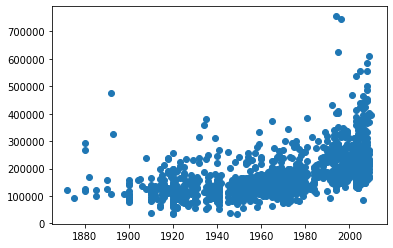

In [61]:
X=df2['YearBuilt'].values.reshape(-1,1)
y=df2['SalePrice'].values
plt.scatter(X,y)

In [62]:
X_poly=PolynomialFeatures(degree=5).fit_transform(X)

In [63]:
X_poly[:,2]

array([4012009., 3904576., 4004001., ..., 3767481., 3802500., 3861225.])

MSE for the simple regression: 4582376228.725916
MSE for the log(X) regression: 4597667111.889747
MSE for the exp(X) regression: 4522276032.11435
MSE for the 2-degree polynomial regression: 4109357885.7812753
MSE for the 5-degree polynomial regression: 4100352028.5287914
MSE for the 10-degree polynomial regression: 4100126157.2077284
MSE for the 15-degree polynomial regression: 4100024154.7373466


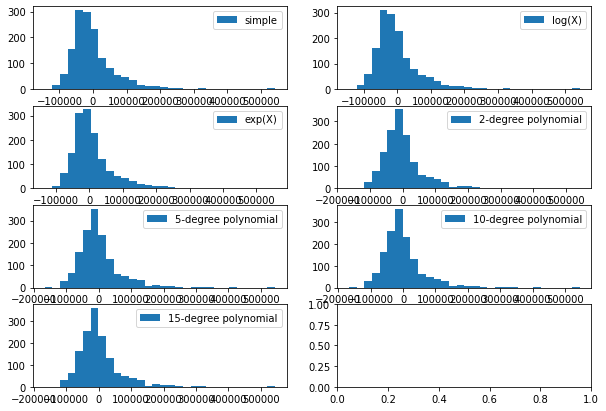

In [64]:
viz_residus(X, y, degree=[2, 5, 10, 15])

* GarageYrBlt

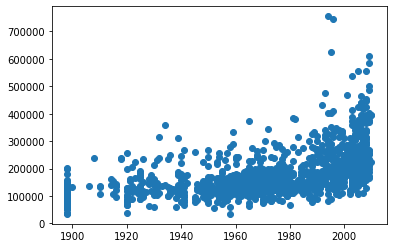

In [65]:
X=df2['GarageYrBlt'].values.reshape(-1,1)
y=df2['SalePrice'].values
plt.scatter(X,y)

MSE for the simple regression: 4620205813.095754
MSE for the log(X) regression: 4632557420.920327
MSE for the exp(X) regression: 4596723062.022771
MSE for the 2-degree polynomial regression: 4335360309.846515
MSE for the 5-degree polynomial regression: 4229250827.927832
MSE for the 10-degree polynomial regression: 4229612926.818237
MSE for the 15-degree polynomial regression: 4230247420.3647256


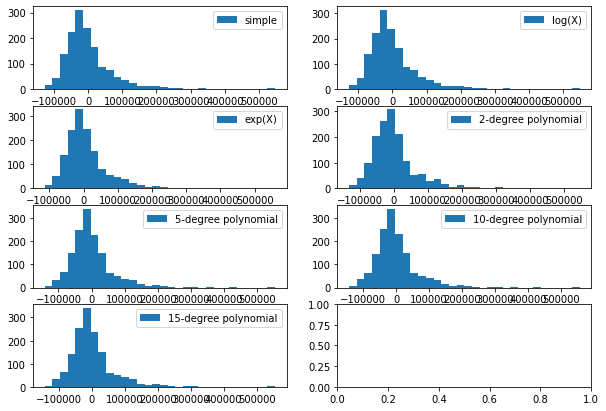

In [66]:
viz_residus(X, y, degree=[2, 5, 10, 15])

For the two features, it seems that the polynomial regression gives better result. The best degree seems to be the highest possible for YearBuilt but 5 for GarageYrBlt. So we will stay on degree 5 for both.

#### Looking for outliers

We can see in the visualization table that mostly all the `SalePrice`>=500000 are considered as outliers. So we will remove them.

In [67]:
df_train_nooutliers=df_train.loc[df_train['SalePrice']<500000,:]

#### Looking for important features

In [68]:
pipeline_for_analyses=Pipeline([
    ('na_filler', NAFiller()),
    ('categorical_encoder', CategoricalEncoder(features=categorical_labels)),
])

df3=pipeline_for_analyses.fit_transform(df_train_nooutliers)

In [69]:
df_pearson=pearsonization(df3, 'SalePrice', [f for f in list(df3) if f!='SalePrice'])
df_pearson

,pearson_coef,p_value,correlation strenght
ExterQual_TA,-0.608757,7.347301e-148,***
KitchenQual_TA,-0.540105,1.160819e-110,***
FireplaceQu_NA,-0.489463,2.860238e-88,***
BsmtQual_TA,-0.469561,1.880987e-80,***
GarageFinish_Unf,-0.424983,1.035709e-64,***
...,...,...,...
TotalBsmtSF,0.596771,1.038478e-140,***
GarageArea,0.633607,1.057579e-163,***
GarageCars,0.654418,3.925642e-178,***
GrLivArea,0.686872,4.524547e-203,***


In [70]:
df_pearson_hcorr=df_pearson.loc[((df_pearson['pearson_coef']<-0.15) | (df_pearson['pearson_coef']>0.15)),:]

All of those above are statistically highly correlated

<AxesSubplot:>

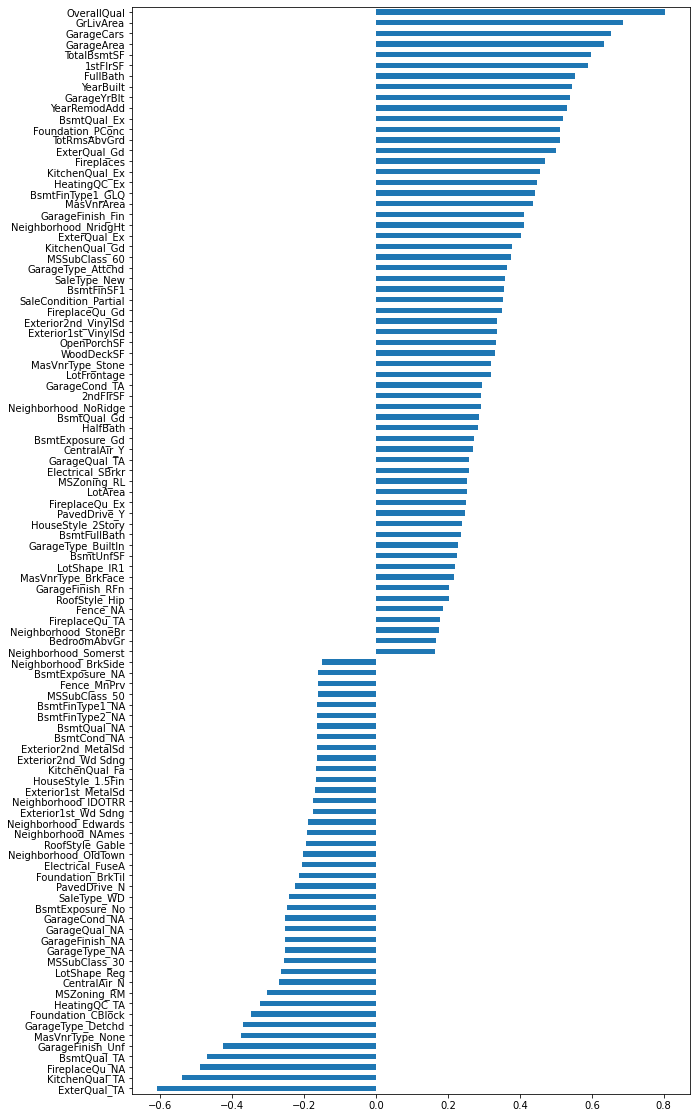

In [71]:
fig, axs = plt.subplots(1,1, figsize=(10,20))
df_pearson_hcorr['pearson_coef'].plot(kind='barh', ax=axs)

Thus we will only take those features into account.

In [72]:
features_for_training=list(df_pearson_hcorr.index)

In [73]:
features_for_training.remove('YearBuilt')
features_for_training.remove('GarageYrBlt')

In [74]:
features_for_training += ['YearBuilt_{}'.format(i) for i in range(6)] + ['GarageYrBlt_{}'.format(i) for i in range(6)]

In [75]:
len(features_for_training)

112

## Data training

In [76]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

### Some useful functions

In [77]:
def hyperparameter_tuning(estimator, hyperparameter, hp_range, X, y):
    kf=KFold(n_splits=5, shuffle=True, random_state=19)
    
    Mean_train, Mean_test = [], []
    Std_train, Std_test = [], []
    
    dinit=datetime.today()
    print('Begining work at {}\n '.format(dinit.strftime('%Y-%m-%d %H:%M:%S')))
    
    for j,hp in enumerate(hp_range):
        d0=datetime.today()
        print('\tBeginning job {} on {}...'.format(j+1, len(hp_range)))
        estimator.__dict__[hyperparameter]=hp
        
        mse_train=[]
        mse_test=[]
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            estimator.fit(X_train, y_train)
            ytrainpred=estimator.predict(X_train)
            ytestpred=estimator.predict(X_test)
            mse_train.append(mean_squared_error(y_train, ytrainpred))
            mse_test.append(mean_squared_error(y_test, ytestpred))
        
        Mean_train.append(np.mean(mse_train))
        Mean_test.append(np.mean(mse_test))
        Std_train.append(np.std(mse_train))
        Std_test.append(np.std(mse_test))
        
        d1=datetime.today()
        m,s=(d1-d0).seconds//60, (d1-d0).seconds%60
        print('\t\t... duration: {}min {}s'.format(m,s))
     
    dend=datetime.today()
    m,s=(dend-dinit).seconds//60, (dend-dinit).seconds%60
    print('\nTotal duration:{}min {}s'.format(m,s))
        
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    
    ax.plot(hp_range, Mean_train, color='b', marker='+', label='train')
    ax.plot(hp_range, [m-s for (m,s) in zip(Mean_train,Std_train)], color='b', linestyle='--')
    ax.plot(hp_range, [m+s for (m,s) in zip(Mean_train,Std_train)], color='b', linestyle='--')
    
    ax.plot(hp_range, Mean_test, color='r', marker='+', label='test')
    ax.plot(hp_range, [m-s for (m,s) in zip(Mean_test,Std_test)], color='r', linestyle='--')
    ax.plot(hp_range, [m+s for (m,s) in zip(Mean_test,Std_test)], color='r', linestyle='--')
    
    ax.set_xlabel('{} range'.format(hyperparameter))
    ax.set_ylabel('MSE')
    ax.legend()
    
    fig.suptitle('MSE of a {} for different values of {}'.format(estimator.__class__.__name__, hyperparameter))

    return Mean_test, Std_test

### Training data

In [78]:
pipeline_for_ML=Pipeline([
    ('na_filler', NAFiller()),
    ('categorical_encoder', CategoricalEncoder(features=categorical_labels)),
    ('non_linear_features', NonLinearFeatures(non_linear_features=['YearBuilt', 'GarageYrBlt'], degree=5)),
    ('features_selector', FeaturesSelector(features=features_for_training)),
    ('standard_scaler', StandardScaler()),
    
])

In [79]:
X=pipeline_for_ML.fit_transform(df_train_nooutliers)
y=df_train_nooutliers['SalePrice'].values

### ElasticNet regression

Begining work at 2020-10-13 11:14:33
 
	Beginning job 1 on 10...
		... duration: 0min 0s
	Beginning job 2 on 10...
		... duration: 0min 0s
	Beginning job 3 on 10...
		... duration: 0min 0s
	Beginning job 4 on 10...
		... duration: 0min 0s
	Beginning job 5 on 10...
		... duration: 0min 0s
	Beginning job 6 on 10...
		... duration: 0min 0s
	Beginning job 7 on 10...
		... duration: 0min 0s
	Beginning job 8 on 10...
		... duration: 0min 0s
	Beginning job 9 on 10...
		... duration: 0min 0s
	Beginning job 10 on 10...
		... duration: 0min 0s

Total duration:0min 0s


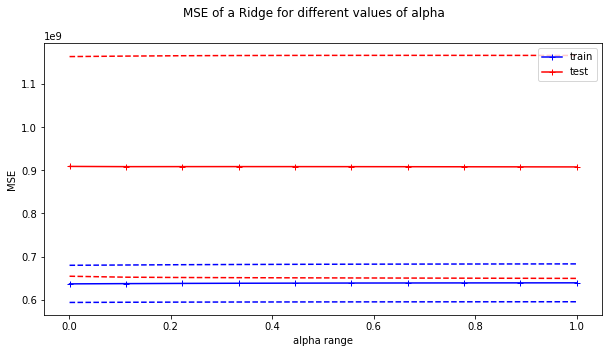

In [80]:
hp_range=np.linspace(0.001,1, 10)

mean_mse_test, std_mse_test = hyperparameter_tuning(
    estimator=Ridge(), 
    hyperparameter='alpha', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [81]:
opt_ind=4

In [82]:
round(np.log(mean_mse_test[opt_ind]), 2), round(np.log(std_mse_test[opt_ind]), 2)

(20.63, 19.37)

In [83]:
best_hp_value=hp_range[opt_ind]
best_hp_value

0.445

### SVM Regression

Begining work at 2020-10-13 11:14:34
 
	Beginning job 1 on 10...
		... duration: 0min 1s
	Beginning job 2 on 10...
		... duration: 0min 1s
	Beginning job 3 on 10...
		... duration: 0min 1s
	Beginning job 4 on 10...
		... duration: 0min 1s
	Beginning job 5 on 10...
		... duration: 0min 1s
	Beginning job 6 on 10...
		... duration: 0min 1s
	Beginning job 7 on 10...
		... duration: 0min 1s
	Beginning job 8 on 10...
		... duration: 0min 1s
	Beginning job 9 on 10...
		... duration: 0min 1s
	Beginning job 10 on 10...
		... duration: 0min 1s

Total duration:0min 15s


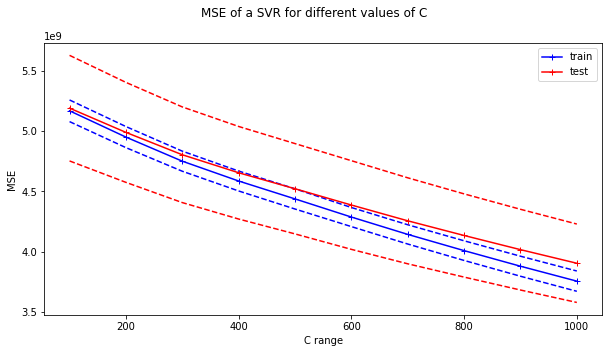

In [84]:
hp_range=np.linspace(100, 1000, 10)

mean_mse_test, std_mse_test = hyperparameter_tuning(
    estimator=SVR(kernel='poly', degree=2, epsilon=1), 
    hyperparameter='C', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [85]:
opt_ind=-1

In [86]:
round(np.log(mean_mse_test[opt_ind]), 2), round(np.log(std_mse_test[opt_ind]), 2)

(22.09, 19.6)

In [87]:
best_hp_value=hp_range[opt_ind]
best_hp_value

1000.0

### KNN

Begining work at 2020-10-13 11:14:49
 
	Beginning job 1 on 20...
		... duration: 0min 0s
	Beginning job 2 on 20...
		... duration: 0min 0s
	Beginning job 3 on 20...
		... duration: 0min 0s
	Beginning job 4 on 20...
		... duration: 0min 0s
	Beginning job 5 on 20...
		... duration: 0min 0s
	Beginning job 6 on 20...
		... duration: 0min 0s
	Beginning job 7 on 20...
		... duration: 0min 0s
	Beginning job 8 on 20...
		... duration: 0min 0s
	Beginning job 9 on 20...
		... duration: 0min 0s
	Beginning job 10 on 20...
		... duration: 0min 0s
	Beginning job 11 on 20...
		... duration: 0min 0s
	Beginning job 12 on 20...
		... duration: 0min 0s
	Beginning job 13 on 20...
		... duration: 0min 0s
	Beginning job 14 on 20...
		... duration: 0min 0s
	Beginning job 15 on 20...
		... duration: 0min 0s
	Beginning job 16 on 20...
		... duration: 0min 0s
	Beginning job 17 on 20...
		... duration: 0min 0s
	Beginning job 18 on 20...
		... duration: 0min 0s
	Beginning job 19 on 20...
		... duration: 0min 0s
	

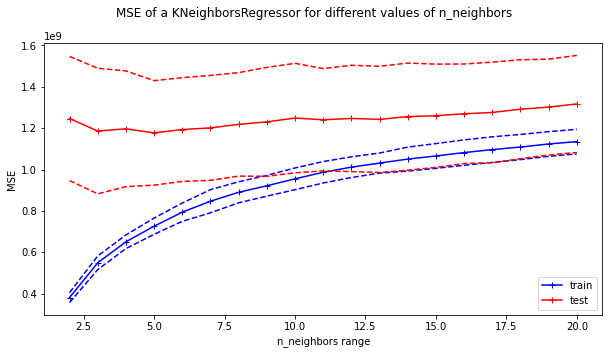

In [88]:
hp_range=[int(i) for i in np.linspace(2,20, 20)]

mean_mse_test, std_mse_test = hyperparameter_tuning(
    estimator=KNeighborsRegressor(n_jobs=-1), 
    hyperparameter='n_neighbors', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [89]:
opt_ind=3

In [90]:
round(np.log(mean_mse_test[opt_ind]), 2), round(np.log(std_mse_test[opt_ind]), 2)

(20.9, 19.45)

In [91]:
best_hp_value=hp_range[opt_ind]
best_hp_value

4

### GradientBoostingRegressor

Begining work at 2020-10-13 11:14:55
 
	Beginning job 1 on 9...
		... duration: 0min 1s
	Beginning job 2 on 9...
		... duration: 0min 2s
	Beginning job 3 on 9...
		... duration: 0min 3s
	Beginning job 4 on 9...
		... duration: 0min 3s
	Beginning job 5 on 9...
		... duration: 0min 4s
	Beginning job 6 on 9...
		... duration: 0min 5s
	Beginning job 7 on 9...
		... duration: 0min 6s
	Beginning job 8 on 9...
		... duration: 0min 7s
	Beginning job 9 on 9...
		... duration: 0min 8s

Total duration:0min 43s


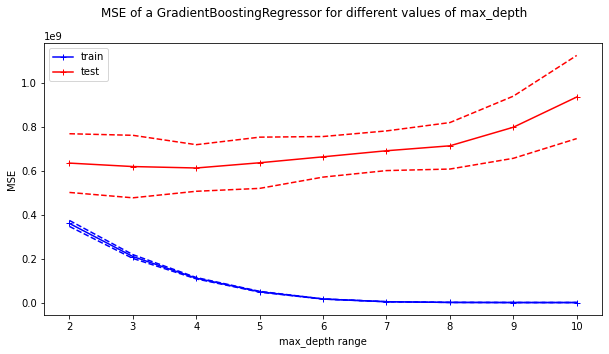

In [92]:
hp_range=[int(i) for i in np.linspace(2,10, 9)]

mean_mse_test, std_mse_test = hyperparameter_tuning(
    estimator=GradientBoostingRegressor(), 
    hyperparameter='max_depth', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [93]:
opt_ind=2

In [94]:
round(np.log(mean_mse_test[opt_ind]), 2), round(np.log(std_mse_test[opt_ind]), 2)

(20.23, 18.48)

In [95]:
best_hp_value=hp_range[opt_ind]
best_hp_value

4

### DecisionTreeRegressor

Begining work at 2020-10-13 11:15:39
 
	Beginning job 1 on 10...
		... duration: 0min 0s
	Beginning job 2 on 10...
		... duration: 0min 0s
	Beginning job 3 on 10...
		... duration: 0min 0s
	Beginning job 4 on 10...
		... duration: 0min 0s
	Beginning job 5 on 10...
		... duration: 0min 0s
	Beginning job 6 on 10...
		... duration: 0min 0s
	Beginning job 7 on 10...
		... duration: 0min 0s
	Beginning job 8 on 10...
		... duration: 0min 0s
	Beginning job 9 on 10...
		... duration: 0min 0s
	Beginning job 10 on 10...
		... duration: 0min 0s

Total duration:0min 0s


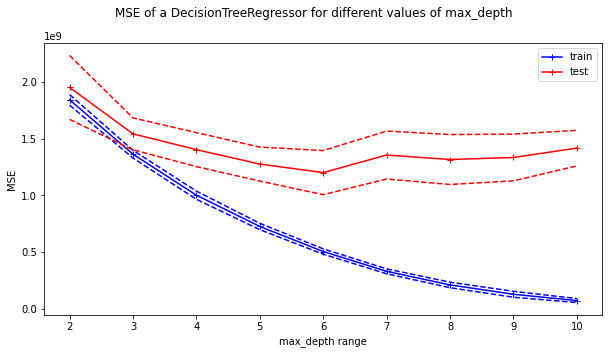

In [96]:
hp_range=[int(i) for i in np.linspace(2,10, 10)]

mean_mse_test, std_mse_test = hyperparameter_tuning(
    estimator=DecisionTreeRegressor(), 
    hyperparameter='max_depth', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [97]:
opt_ind=3

In [98]:
round(np.log(mean_mse_test[opt_ind]), 2), round(np.log(std_mse_test[opt_ind]), 2)

(21.06, 18.82)

In [99]:
best_hp_value=hp_range[opt_ind]
best_hp_value

4

### RandomForestRegressor

##### max_depth

Begining work at 2020-10-13 11:15:39
 
	Beginning job 1 on 7...
		... duration: 0min 4s
	Beginning job 2 on 7...
		... duration: 0min 5s
	Beginning job 3 on 7...
		... duration: 0min 5s
	Beginning job 4 on 7...
		... duration: 0min 5s
	Beginning job 5 on 7...
		... duration: 0min 6s
	Beginning job 6 on 7...
		... duration: 0min 6s
	Beginning job 7 on 7...
		... duration: 0min 6s

Total duration:0min 40s


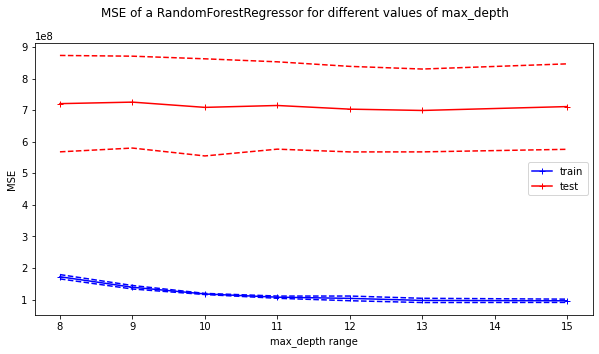

In [100]:
hp_range=[int(i) for i in np.linspace(8,15, 7)]

mean_mse_test, std_mse_test = hyperparameter_tuning(
    estimator=RandomForestRegressor(), 
    hyperparameter='max_depth', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [101]:
opt_ind=2

In [102]:
round(np.log(mean_mse_test[opt_ind]), 2), round(np.log(std_mse_test[opt_ind]), 2)

(20.38, 18.85)

In [103]:
best_hp_value=hp_range[opt_ind]
best_hp_value

10

##### max_leaf_nodes

Begining work at 2020-10-13 11:16:20
 
	Beginning job 1 on 10...
		... duration: 0min 1s
	Beginning job 2 on 10...
		... duration: 0min 2s
	Beginning job 3 on 10...
		... duration: 0min 2s
	Beginning job 4 on 10...
		... duration: 0min 3s
	Beginning job 5 on 10...
		... duration: 0min 3s
	Beginning job 6 on 10...
		... duration: 0min 3s
	Beginning job 7 on 10...
		... duration: 0min 3s
	Beginning job 8 on 10...
		... duration: 0min 3s
	Beginning job 9 on 10...
		... duration: 0min 4s
	Beginning job 10 on 10...
		... duration: 0min 4s

Total duration:0min 33s


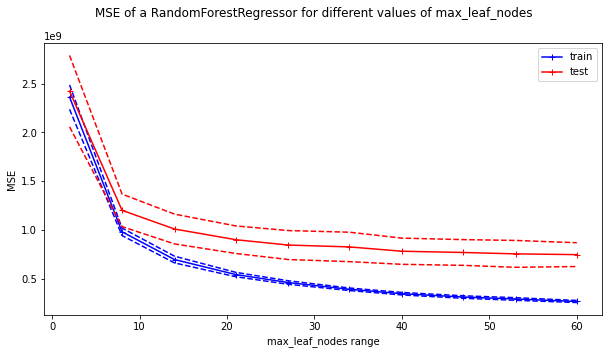

In [104]:
hp_range=[int(i) for i in np.linspace(2, 60, 10)]

mean_mse_test, std_mse_test = hyperparameter_tuning(
    estimator=RandomForestRegressor(), 
    hyperparameter='max_leaf_nodes', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [105]:
opt_ind=4

In [106]:
round(np.log(mean_mse_test[opt_ind]), 2), round(np.log(std_mse_test[opt_ind]), 2)

(20.56, 18.82)

In [107]:
best_hp_value=hp_range[opt_ind]
best_hp_value

27

### ExtraTreesRegressor

Begining work at 2020-10-13 11:16:53
 
	Beginning job 1 on 7...
		... duration: 0min 2s
	Beginning job 2 on 7...
		... duration: 0min 3s
	Beginning job 3 on 7...
		... duration: 0min 3s
	Beginning job 4 on 7...
		... duration: 0min 4s
	Beginning job 5 on 7...
		... duration: 0min 4s
	Beginning job 6 on 7...
		... duration: 0min 4s
	Beginning job 7 on 7...
		... duration: 0min 5s

Total duration:0min 28s


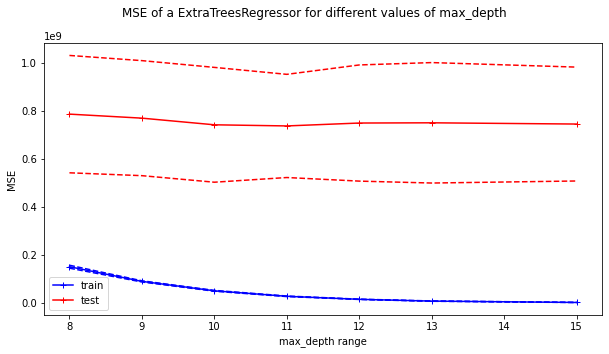

In [108]:
hp_range=[int(i) for i in np.linspace(8,15, 7)]

mean_mse_test, std_mse_test = hyperparameter_tuning(
    estimator=ExtraTreesRegressor(), 
    hyperparameter='max_depth', 
    hp_range=hp_range, 
    X=X, 
    y=y,
)

In [109]:
opt_ind=3

In [110]:
round(np.log(mean_mse_test[opt_ind]), 2), round(np.log(std_mse_test[opt_ind]), 2)

(20.42, 19.19)

In [111]:
best_hp_value=hp_range[opt_ind]
best_hp_value

11

### Best estimator: GardientBoosting

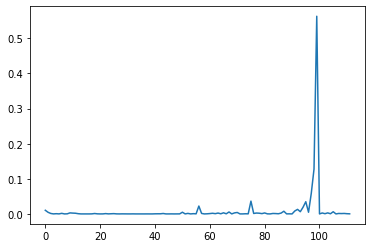

In [112]:
gbr=GradientBoostingRegressor(max_depth=4)
gbr.fit(X,y)
plt.plot(gbr.feature_importances_)

## Predicting

In [113]:
df_test=pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [114]:
df_test.shape

(1459, 80)

In [115]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [116]:
X_test=pipeline_for_ML.transform(df_test)

In [117]:
y_testpred=gbr.predict(X_test)

In [118]:
df_ypred=pd.DataFrame(index=df_test['Id'], data={'SalePrice': y_testpred})
df_ypred

,SalePrice
Id,
1461,118154.016825
1462,157792.167857
1463,182320.205715
1464,189845.107587
1465,189418.331986
...,...
2915,76822.625201
2916,89230.525557
2917,170622.815283


In [119]:
df_ypred.to_csv('Submission.csv')